In [21]:
# Importation des bibliothèques
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# construction de model CNN

# Choix de modele sequenciel
classifier = Sequential()

# Première couche de convolutionnel  accompagnée d'une matrice de 2 dimension (Max pooling) et fonction d'activation
classifier.add(Convolution2D(64, (3, 3), input_shape=(96,96,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# 2eme P couche de convolutionnel  accompagnée d'une matrice de 3 dimension (Max pooling) et fonction d'activation
classifier.add(Convolution2D(64, (3, 3), activation='relu'))
# input_shape va être obtenue de la couche de convolution précédente
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# La couche Flattening  converte les données obtenués(poolled images) en une matrice  d'un seule dimension
classifier.add(Flatten())

# les couches entièrement connectée
classifier.add(Dense(units=128, activation='relu'))#128  neurones
classifier.add(Dense(units=6, activation='softmax'))   # unit= 5 classes en couche de sortie softmax -ici pour l classification
# compilation de notre model CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 




# faire la normalisation pour les données de notre base de données
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True)


test_datagen = ImageDataGenerator(
       rescale=1./255,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True)


#Les variables d'apprentissage et test et choisir la categorie de notre modele
training_set = train_datagen.flow_from_directory('dataset/Train',
                                                 target_size=(96,96),
                                                 batch_size=27,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size=(96,96),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical')




Found 3245 images belonging to 6 classes.
Found 3245 images belonging to 6 classes.


In [22]:
#Debut d apprentissage methode 01
#classifier.fit_generator(
      #  training_set,
       # steps_per_epoch=13, # nombre d'iterations dans chaque epoch
        #epochs=5,#nombre des iterations totale
       # validation_data=test_set,
       # validation_steps=31)# nombre d'teration prise de dossier 'train' pour l'apprentissage 

In [23]:
#Debut2d apprentissage methode 01
batch_size=50
hist=classifier.fit(training_set,steps_per_epoch=training_set.samples//batch_size,
                    validation_data=test_set,validation_steps=test_set.samples//batch_size,
                    epochs=50
                   )

Epoch 1/50
64/64 [==============================] - 51s 794ms/step - loss: 0.3223 - accuracy: 0.9033 - val_loss: 0.0734 - val_accuracy: 0.9757
Epoch 2/50
64/64 [==============================] - 48s 755ms/step - loss: 0.0301 - accuracy: 0.9918 - val_loss: 0.0270 - val_accuracy: 0.9942
Epoch 3/50
64/64 [==============================] - 46s 717ms/step - loss: 0.0330 - accuracy: 0.9918 - val_loss: 0.1256 - val_accuracy: 0.9554
Epoch 4/50
64/64 [==============================] - 44s 692ms/step - loss: 0.0454 - accuracy: 0.9873 - val_loss: 0.0177 - val_accuracy: 0.9959
Epoch 5/50
64/64 [==============================] - 43s 680ms/step - loss: 0.0141 - accuracy: 0.9965 - val_loss: 0.0089 - val_accuracy: 0.9971
Epoch 6/50
64/64 [==============================] - 43s 681ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.0065 - val_accuracy: 0.9971
Epoch 7/50
64/64 [==============================] - 43s 678ms/step - loss: 0.0151 - accuracy: 0.9936 - val_loss: 0.0089 - val_accuracy: 0.9971

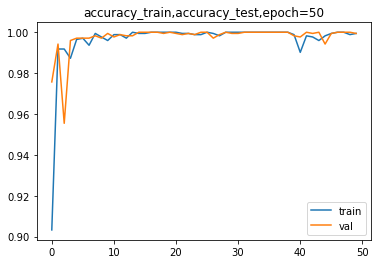

In [24]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='val')
plt.title('accuracy_train,accuracy_test,epoch=50')
plt.legend()
plt.show()

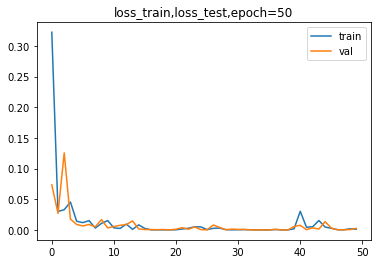

In [25]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='val')
plt.title('loss_train,loss_test,epoch=50')
plt.legend()
plt.show()

In [26]:
# Saving the model
model_json_alphabet = classifier.to_json()
with open("model-bw_alphabet.json", "w") as json_file_alphabet:
    json_file_alphabet.write(model_json_alphabet)
classifier.save_weights('model-bw_alphabet.h5')

In [27]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 94, 94, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 30976)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              